# PIMA Indians Diabetes


## Objective

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Data


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

1. **Pregnancies**: Number of times pregnant
2. **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **BloodPressure**: Diastolic blood pressure (mm Hg)
4. **SkinThickness**: Triceps skin fold thickness (mm)
5. **Insulin**: 2-Hour serum insulin (mu U/ml)
6. **BMI**: Body mass index (weight in kg/(height in m)^2)
7. **DiabetesPedigreeFunction**: Diabetes pedigree function
8. **Age**: Age (years)
9. **Outcome**: Class variable (0 or 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/diabetes.csv')
print(df.shape)
df.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Identifying and correcting Data types

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Data Visualisation & Feature Selection

In [6]:
# Lets check the figures as well
for c in df.columns:
    if c not in ['Pregnancies', 'Outcome']:
        print ('0 values in', c, ':', sum(df[c]==0))

0 values in Glucose : 5
0 values in BloodPressure : 35
0 values in SkinThickness : 227
0 values in Insulin : 374
0 values in BMI : 11
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0


### Correlation between features

Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation. 

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

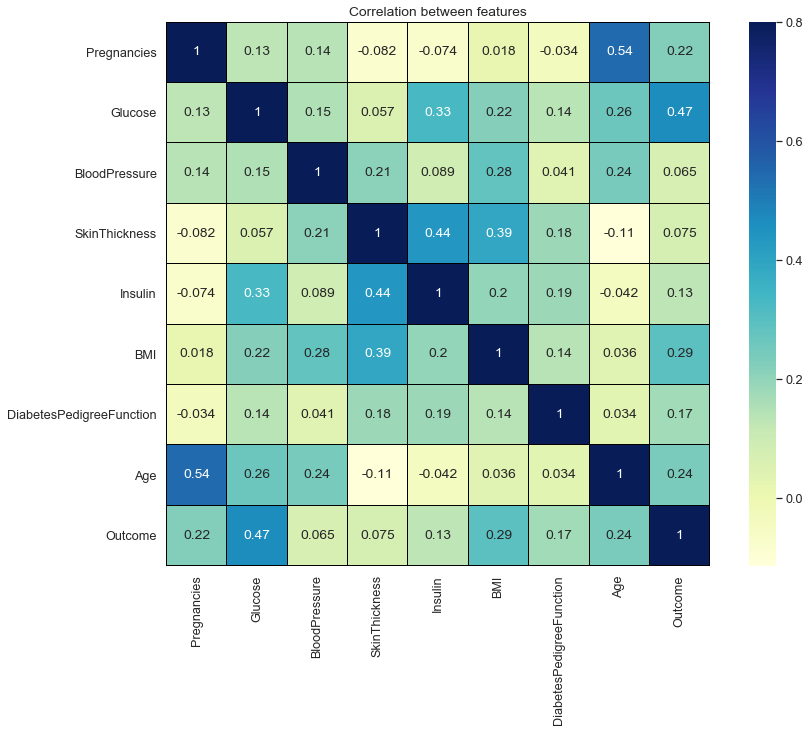

In [9]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

## Fixing Missing Values - Imputer

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='median')

In [12]:
df[df.columns[1:8]] = pd.DataFrame(imputer.fit_transform(df[df.columns[1:8]]))

In [13]:
# Lets check the figures again
for c in df.columns:
    if c not in ['Pregnancies', 'Outcome']:
        print ('0 values in', c, ':', sum(df[c]==0))

0 values in Glucose : 0
0 values in BloodPressure : 0
0 values in SkinThickness : 0
0 values in Insulin : 0
0 values in BMI : 0
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0


## Data Scaling- StandScaler / MinMaxScaler

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[df.columns[0:8]])
df[df.columns[0:8]] = scaler.transform(df[df.columns[0:8]])

C:\Users\mangi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493742,0.240305,0.152250,0.291518,0.168179,0.204015,0.348958
std,0.198210,0.196376,0.123435,0.095557,0.103826,0.140597,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.489796,0.239130,0.133413,0.288344,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modelling

### Dataset Preparation

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=0)

### Logistic Regression

Testing Accuracy  79.16666666666666


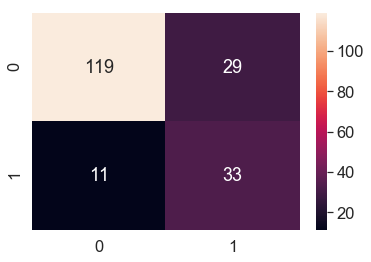

In [18]:
#Model
LR = LogisticRegression(solver="sag", max_iter=10000)

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Testing Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### Decision Tree

Testing Accuracy  77.08333333333334


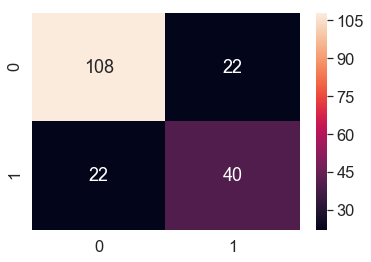

In [19]:
#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Testing Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Decision Tree hyperparameter tuning.
DTC = DecisionTreeClassifier()

# Define parameter grid.
dt_param_grid = {"max_depth": [4, 6, 8, 10],
                 "max_features": ["sqrt", "log2", 2, 5, 8],
                 "min_samples_split": [3, 4, 5, 10],
                 "min_samples_leaf": [3, 4, 5, 10],
                 "criterion": ["gini", "entropy"],
                 "class_weight": [None, 'balanced']
                }

# Search grid and store best estimator.
gsDTC = GridSearchCV(DTC,param_grid = dt_param_grid, cv=5, 
                     scoring="f1", n_jobs= 4)
gsDTC.fit(X_train,y_train)
DTC_best = gsDTC.best_estimator_

# Print best score.
print('Best score: {}'.format(gsDTC.best_score_))
print('Best parameters: {}'.format(gsDTC.best_params_))

Best score: 0.7042938997533655
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 10}


C:\Users\mangi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest hyperparameter tuning. 
RFC = RandomForestClassifier()

# Define parameter grid.
rf_param_grid = {"max_depth": [4, 6, 8, 10],
                 "max_features": ["sqrt", "log2", 2, 5, 8],
                 "min_samples_split": [3, 4, 5, 8],
                 "min_samples_leaf": [3, 4, 5, 8],
                 "bootstrap": [False, True],
                 "n_estimators" :[100],
                 "criterion": ["gini", "entropy"],
                 "class_weight": [None, 'balanced']
                }
                
# Search grid and store best estimator.
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=4, scoring="f1", n_jobs= 4)
gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Print best score.
print('Best score: {}'.format(gsRFC.best_score_))
print('Best parameters: {}'.format(gsRFC.best_params_))

C:\Users\mangi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.7085972842433594
Best parameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 100}



Feature Importances for Best Model:


Text(0, 0.5, 'Features')

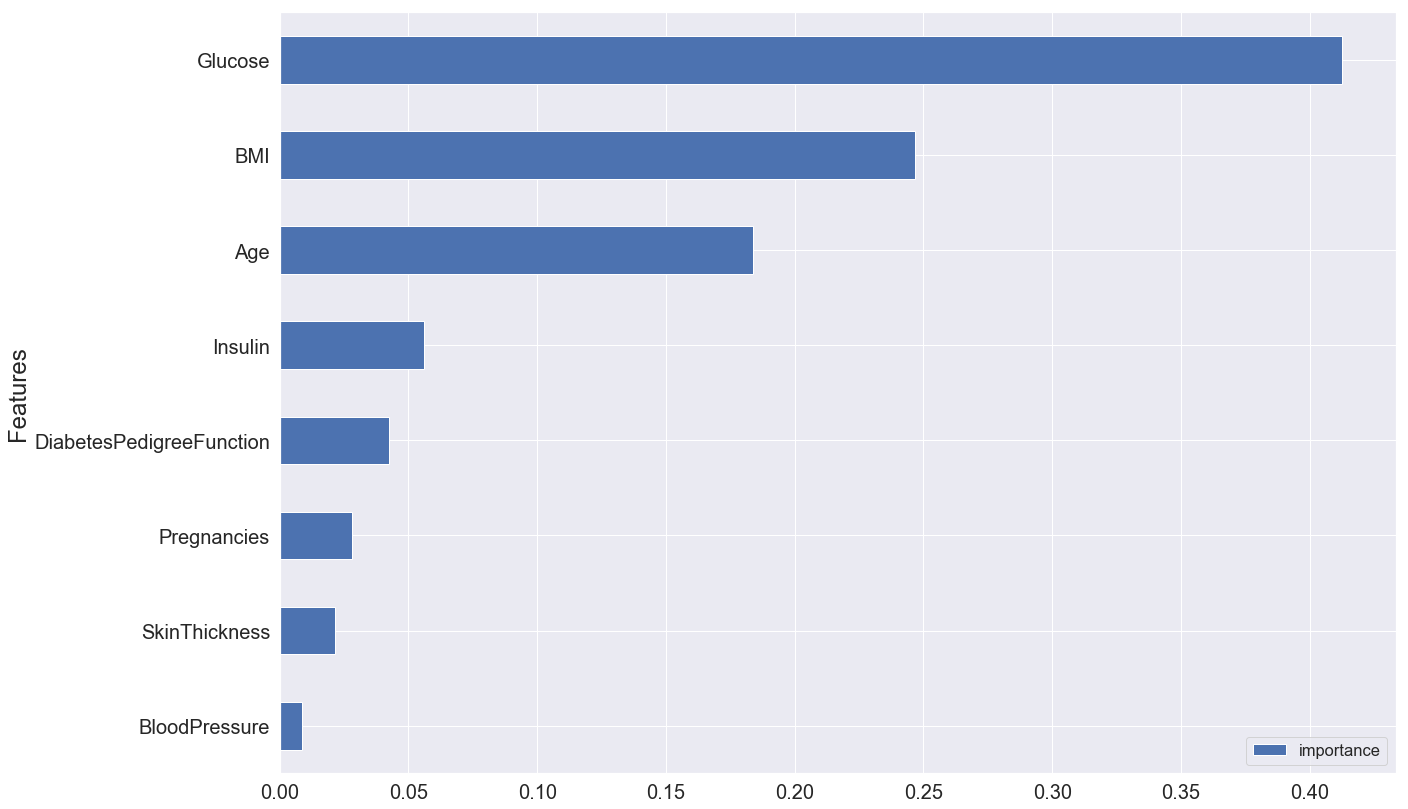

In [22]:
#Look at feature importances for best model.
RFC_best.fit(X_train,y_train)
features_best = pd.DataFrame()
features_best['feature'] = X_train.columns
features_best['importance'] = RFC_best.feature_importances_
features_best.sort_values(by=['importance'], ascending=True, inplace=True)
features_best.set_index('feature', inplace=True)

#Plot.
print("\nFeature Importances for Best Model:")
ax = features_best.plot(kind='barh', figsize=(20, 14), fontsize=20)
ax.set_ylabel("Features", fontname="Arial", fontsize=24)

In [23]:
# Print Classification Report for both training and test data.
test_predictions = RFC_best.predict(X_test)
train_predictions = RFC_best.predict(X_train)
print('\n***Training Data***')
print('\nClassification Report:')
print(classification_report(y_train, train_predictions))
print('\n***Test Data***')
print('\nClassification Report:')
print(classification_report(y_test, test_predictions))


***Training Data***

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       370
           1       0.66      0.88      0.76       206

   micro avg       0.80      0.80      0.80       576
   macro avg       0.79      0.81      0.79       576
weighted avg       0.83      0.80      0.80       576


***Test Data***

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       130
           1       0.61      0.82      0.70        62

   micro avg       0.78      0.78      0.78       192
   macro avg       0.76      0.79      0.76       192
weighted avg       0.81      0.78      0.78       192



### Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Accuracy  78.64583333333334


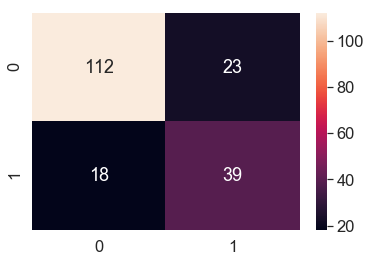

In [24]:
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### Stacking

#### First level model
Defining the first level models for stacking. <br> 
We are using three models: 
- KNN-Classifier, 
- Random Forest Classifier
- XGBoost Classifier.

In [25]:
# !pip install vecstack
# Also refer to: https://github.com/vecxoz/vecstack

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [27]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [28]:
S_train, S_test = stacking(models, X_train, y_train, X_test, 
                           regression=False, mode='oof_pred_bag', 
                           needs_proba=False, save_dir=None, 
                           metric=accuracy_score, n_folds=4, 
                           stratified=True, shuffle=True, 
                           random_state=0,    
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.68965517]
    fold  1:  [0.73793103]
    fold  2:  [0.74125874]
    fold  3:  [0.77622378]
    ----
    MEAN:     [0.73626718] + [0.03080947]
    FULL:     [0.73611111]

model  1:     [RandomForestClassifier]
    fold  0:  [0.74482759]
    fold  1:  [0.69655172]
    fold  2:  [0.80419580]
    fold  3:  [0.76923077]
    ----
    MEAN:     [0.75370147] + [0.03916528]
    FULL:     [0.75347222]

model  2:     [XGBClassifier]
    fold  0:  [0.72413793]
    fold  1:  [0.73793103]
    fold  2:  [0.79020979]
    fold  3:  [0.73426573]
    ----
    MEAN:     [0.74663612] + [0.02565949]
    FULL:     [0.74652778]



#### Second level model

In [29]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3,verbose=True)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.78645833]
